In [3]:
# import Pkg; Pkg.add("Tables")

In [4]:
using Plots
using DataFrames
using CSV
using Tables

SyntaxError: invalid syntax (<ipython-input-4-5f97693b0dac>, line 1)

# Generate data
* either generate the data
* OR read it from csv

In [ ]:
# my_function = (x)-> x^2+x
# my_function_r = (x)-> (x+2.5)^2-2 .+ rand(1)[1]*0.1
filename = "mydata.csv"
if isfile(filename)==false
    println("generating data")
    x = collect(-1:0.01:1)
    y = x.^2;
    y += rand(Float32, size(x)[1])*0.1;
    df = DataFrame((x=x, y  =y));
    CSV.write(filename, df)
else
    println("Reading file")
    df = DataFrame(CSV.File(filename));
    x = df[!,"x"];
    y = df[!, "y"];
end
xpoints = x;
ypoints = y;


generating data


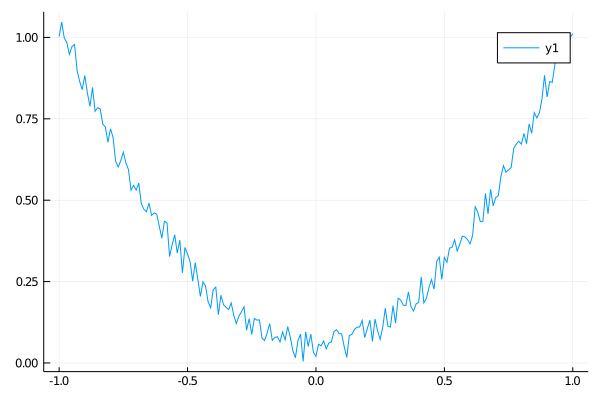

In [ ]:
plot(xpoints,ypoints)

In [ ]:
function derivative(f) 
    return function(x)   
  # pick a small value for h 
        h = x == 0 ? sqrt(eps(Float64)) : sqrt(eps(Float64)) * x 
        xph = x + h 
        dx = xph - x 
        f1 = f(xph) # evaluate f at x + h 
        f0 = f(x) # evaluate f at x 
        return (f1 - f0) / dx  # divide by h 
    end 
end 

derivative (generic function with 1 method)

In [ ]:
x = 0.119
diff = x.-xpoints
delta = broadcast(abs, diff);

In [ ]:
am = argmin(delta)
y1 = delta[am]
if y1 == 0.0
    println("Exact find")
elseif am == length(diff)
    am2 = am - 1
    y2 = delta[am2]
    println("At end of vector")

elseif am ==1
    println("At beginning of vector")
    am2 = am+1
    y2 = delta[am2]
else
    up = am+1
    down = am-1
    # condition? if true: if false
    am_delta = delta[up]<=delta[down] ? 1 : -1
    am2 = am+am_delta
    y2 = delta[am2]
    println("am is $am and am2 is $am2. y1 $y1 and y2 $y2")

end
# if delta_smallest


am is 113 and am2 is 112. y1 0.0010000000000000009 and y2 0.008999999999999994


In [ ]:
# function my_function2(x)
    
#     y = (x+0.5)^2
#     if abs(x-0.2)<0.3
#         y+= (x+0.2)^2
#     end
#     return y
# end

my_function2 (generic function with 1 method)

In [ ]:
# x = range(-1,stop=1,length=50)
# y = my_function2.(x);

In [ ]:
plot(x,y)

NameError: name 'plot' is not defined

In [ ]:
rand(1)[1]*0.1

0.0797070684037682

In [ ]:
my_function(2)

UndefVarError: [91mUndefVarError: my_function not defined[39m

In [ ]:
trial_x =[x for x in  range(-20,stop = 20)];
argmin(trial_x)
# trial_x
# [x1^2 for x1 in x]

1

In [ ]:
function find_a_min(funct_input, start = 1)
    f_dydx = derivative(funct_input)
    # println("found f_dydx")
    # trial_x =[x for x in  range(-20,stop = 20)]
    # y = funct_input.(trial_x) # NOTE the dot for element wise computation
    # idx = argmin(y)
    # x_i = trial_x[idx] # x sub i
    x_i = start
    # println("argmin is $idx with x value of $x_i")
    step = 1e-2
    eps_ = 1e-7
    x_list = []
    dydx_list = []
    for i in range(1,length = 3000)
        # get the gradient
        dydx = f_dydx(x_i)
        if abs(dydx)<eps_
            println("Found a min at $x_i. Iteration $i")
            return x_i,x_list,dydx_list
        end
        x_delta = -dydx*step # step in the negative gradient
        x_i = x_i+x_delta
        push!(x_list, x_i)
        push!(dydx_list, dydx)


    end

    println("Did NOT terminate. x =  $x_i")
    return x_i,x_list,dydx_list
end

find_a_min (generic function with 2 methods)

Found a min at -0.4999999472113128. Iteration 839
  0.000404 seconds (4.24 k allocations: 99.500 KiB)


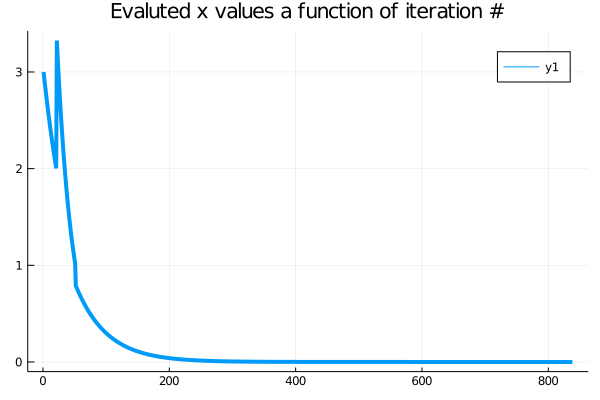

In [ ]:

@time x, xs,dydx_list = find_a_min(my_function2);
plot(dydx_list, lw = 4, title = "Evaluted x values a function of iteration #")

In [ ]:
function find_a_min_momentum(funct_input, start = 1)
    f_dydx = derivative(funct_input)
    # # println("found f_dydx")
    # trial_x =[x for x in  range(-20,stop = 20)]
    # y = funct_input.(trial_x) # NOTE the dot for element wise computation
    # idx = argmin(y)
    x_i = start # trial_x[idx] # x sub i
    # println("argmin is $idx with x value of $x_i")
    step = 1e-1
    m_t = 0
    m_t_minus_1 = 0
    beta = 0.5
    eps_ = 1e-7
    x_list = []
    for i in range(1,length = 3000)
        # get the gradient
        dydx = f_dydx(x_i)
        if abs(dydx)<eps_
            println("Found a min at $x_i. Iteration $i")
            return x_i,x_list
        end
        m_t = beta*m_t_minus_1+(1-beta)*dydx
        x_delta = -m_t*step # step in the negative gradient
        x_i = x_i+x_delta
        m_t_minus_1 = m_t
        push!(x_list, x_i)


    end

    println("Did NOT terminate. x =  $x_i")
    return x_i,x_list
end

find_a_min_momentum (generic function with 2 methods)

In [ ]:
@time x, xs = find_a_min_momentum(my_function);

Found a min at -0.49999999971101844. Iteration 42
  0.016712 seconds (47.75 k allocations: 2.563 MiB)


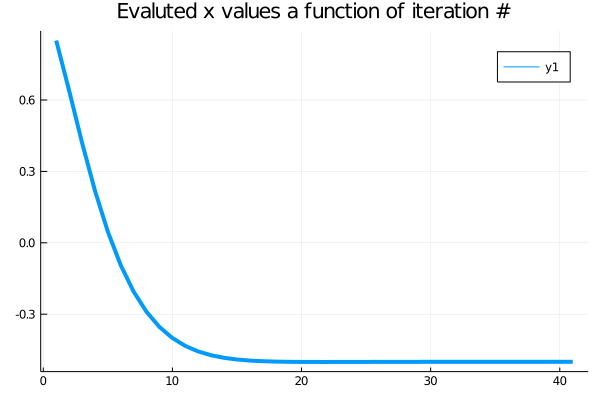

In [ ]:
plot(xs, lw = 4, title = "Evaluted x values a function of iteration #")

In [ ]:
function find_a_min_rmsp(funct_input, start = 1)
    f_dydx = derivative(funct_input)
    # # println("found f_dydx")
    # trial_x =[x for x in  range(-20,stop = 20)]
    # y = funct_input.(trial_x) # NOTE the dot for element wise computation
    # idx = argmin(y)
    x_i = start # trial_x[idx] # x sub i
    # println("argmin is $idx with x value of $x_i")
    step = 1e-1 # basically the learning rate. 
    v_t = 0
    v_t_minus_1 = 0
    beta = 0.9
    eps_ = 1e-7
    x_list = []
    for i in range(1,length = 3000)
        # get the gradient
        dydx = f_dydx(x_i)
        if abs(dydx)<eps_
            println("Found a min at $x_i. Iteration $i")
            return x_i,x_list
        end
        # m_t = beta*m_t_minus_1+(1-beta)*dydx
        v_t = beta*v_t_minus_1 +(1-beta)*dydx^2
        update_term = 1/(v_t+1e-9)*dydx
        x_delta = -update_term*step # step in the negative gradient
        x_i = x_i+x_delta
        v_t_minus_1 = v_t
        push!(x_list, x_i)


    end

    println("Did NOT terminate. x =  $x_i")
    return x_i,x_list
end

find_a_min_rmsp (generic function with 2 methods)

In [ ]:
@time x, xs = find_a_min_rmsp(my_function);

Found a min at -0.5000000064818624. Iteration 32
  0.000367 seconds (408 allocations: 7.563 KiB)


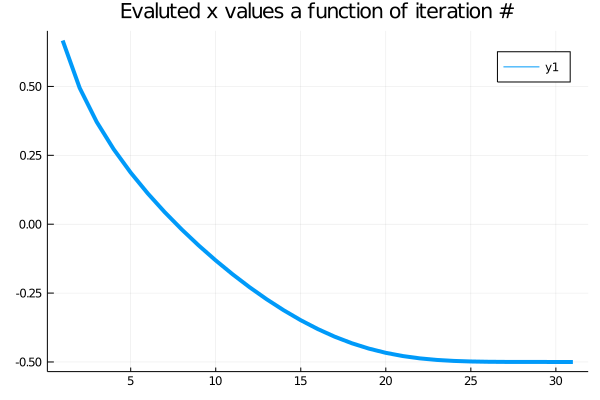

In [ ]:
plot(xs, lw = 4, title = "Evaluted x values a function of iteration #")

In [ ]:
function find_a_min_adam(funct_input, start = 1)
    f_dydx = derivative(funct_input)
    # # println("found f_dydx")
    # trial_x =[x for x in  range(-20,stop = 20)]
    # y = funct_input.(trial_x) # NOTE the dot for element wise computation
    # idx = argmin(y)
    x_i = start # trial_x[idx] # x sub i
    # println("argmin is $idx with x value of $x_i")
    step = 1e-1 # basically the learning rate. 
    v_t = 0
    v_t_minus_1 = 0
    beta_1 = 0.9
    beta_2 = 0.9
    eps_ = 1e-7
    x_list = []
    for i in range(1,length = 3000)
        # get the gradient
        dydx = f_dydx(x_i)
        if abs(dydx)<eps_
            println("Found a min at $x_i. Iteration $i")
            return x_i,x_list
        end
        # m_t = beta*m_t_minus_1+(1-beta)*dydx
        v_t = beta*v_t_minus_1 +(1-beta)*dydx^2
        update_term = 1/(v_t+1e-9)*dydx
        x_delta = -update_term*step # step in the negative gradient
        x_i = x_i+x_delta
        v_t_minus_1 = v_t
        push!(x_list, x_i)


    end

    println("Did NOT terminate. x =  $x_i")
    return x_i,x_list
end

In [ ]:
# @doc range(length=200)
for i in range(1,length = 3)
    print(i)
end

123

In [ ]:
x_list = []

0-element Array{Any,1}

In [ ]:
@doc push

No documentation found.

Binding `push` does not exist.


In [ ]:
# code_native(f, (Any,)) 